In [58]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [59]:
upset_data = pd.read_csv("upset_data.csv")

In [60]:
upset = upset_data.drop(["Unnamed: 0.1", "Unnamed: 0","LSEED","LSCORE","HSCORE","HSEED","HTEAM","LTEAM","ROUND","G","W","SCORE_DIFF","UPSET"], axis = 1)

In [61]:
X_train_cart = upset[upset["YEAR"]<=2018]
X_test_cart = upset[upset["YEAR"]>2018]

In [62]:
X_train_cart

,YEAR,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T
0,2013,2.6,-2.3,0.0575,0.2,-1.9,5.8,0.3,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5
1,2013,3.3,3.2,-0.0056,-2.0,2.5,-1.7,-1.1,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9
2,2013,2.8,11.3,-0.1066,0.5,3.4,0.2,3.5,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0
3,2013,11.8,-10.0,0.2949,1.3,-3.2,-1.8,1.6,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8
4,2013,4.5,-0.1,0.0688,1.1,4.2,5.1,3.3,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018,12.6,-4.4,0.1604,4.8,-4.0,2.2,-5.3,7.8,1.8,4.5,-18.3,5.6,-5.2,2.0,-1.2,1.3
284,2018,7.5,-8.5,0.3621,0.4,-2.5,0.0,0.9,0.0,3.6,3.6,6.0,5.3,-2.1,-4.1,-2.0,-2.8
285,2018,-3.7,3.4,-0.0781,6.9,0.7,1.2,-1.0,-11.3,-5.2,-3.3,-12.4,9.3,1.0,1.8,0.2,-0.7
286,2018,12.1,-6.7,0.2720,-4.3,0.0,-0.7,4.9,14.6,-2.2,-1.8,15.2,-6.7,-3.3,-0.6,3.0,-4.7


In [63]:
X_train = X_train_cart.drop(["YEAR"], axis =1 )
X_test= X_test_cart.drop(["YEAR"], axis =1 )
Y_train = upset_data[upset_data["YEAR"]<=2018]["UPSET"]
Y_test = upset_data[upset_data["YEAR"]>2018]["UPSET"]



In [64]:
dat_21 = pd.read_csv("r1games_2021.csv")

In [70]:
data_21_new = dat_21.drop(["Unnamed: 0","LSEED","HSEED","HTEAM","LTEAM","ROUND","G","W"], axis = 1)

In [71]:
old_data_21 = upset_data[upset_data["YEAR"]>=2021].drop(["UPSET","SCORE_DIFF","YEAR"], axis = 1)

In [72]:
data_21_new = data_21_new.drop(["YEAR", "WAB"], axis = 1) * -1

In [65]:

clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,Y_train)

In [66]:
preds = clf.predict(X_test)

In [67]:
preds

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [68]:
clf.score(X_test,Y_test)

0.9157894736842105

In [69]:
sum(preds-Y_test)

-8.0

In [70]:
clf.feature_importances_

array([0.        , 0.        , 0.91416003, 0.        , 0.        ,
       0.        , 0.02960757, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0562324 ])

In [72]:
clf.feature_names_in_

array(['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', 'X2P_O', 'X2P_D', 'X3P_O', 'X3P_D',
       'ADJ_T'], dtype=object)

[Text(0.4230769230769231, 0.875, 'X[2] <= -0.013\ngini = 0.392\nsamples = 288\nvalue = [211, 77]'),
 Text(0.15384615384615385, 0.625, 'X[6] <= 1.55\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= -0.04\ngini = 0.408\nsamples = 21\nvalue = [6, 15]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.6923076923076923, 0.625, 'X[2] <= 0.068\ngini = 0.181\nsamples = 228\nvalue = [205, 23]'),
 Text(0.5384615384615384, 0.375, 'X[15] <= -1.95\ngini = 0.368\nsamples = 74\nvalue = [56, 18]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.8461538461538461, 0.375, 'X[2] <= 0.153\ngini = 0.063\nsamples = 154\nvalue = [149, 5]'),
 Text(0.7

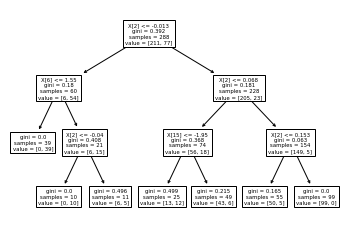

In [71]:
tree.plot_tree(clf)

In [30]:
clf.score(X_train,Y_train)

0.9027777777777778

In [14]:
from sklearn import metrics 
metrics.confusion_matrix(Y_test, clf.predict(X_test))

array([[65,  0],
       [ 8, 22]])

## XGBoost Classifier

In [41]:
import xgboost as xgb
xgbC = xgb.XGBClassifier(max_depth = 3)

In [42]:
xgbC.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
xgbC.score(X_test,Y_test)

0.9052631578947369

In [44]:
xgbC.score(X_train,Y_train)

1.0

In [73]:
params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [2, 3, 4, 5],
        'n_estimators': [20,50,100,300,500,1000]
        }

xgb_grid = GridSearchCV(xgb.XGBClassifier(),
                        params,
                        cv = 5,
                        n_jobs = 5,
                        scoring = 'accuracy',
                        verbose=True)

xgb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [74]:
xgb_grid.best_estimator_.score(X_test,Y_test)


0.9263157894736842

In [47]:
metrics.confusion_matrix(Y_test,xgb_grid.best_estimator_.predict(X_test))

NameError: name 'metrics' is not defined

In [75]:
xgb_grid.feature_names_in_

array(['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', 'X2P_O', 'X2P_D', 'X3P_O', 'X3P_D',
       'ADJ_T'], dtype='<U7')

In [76]:
xgb_grid.best_estimator_.feature_importances_

array([0.12053304, 0.08568837, 0.34055173, 0.0213714 , 0.06790414,
       0.        , 0.05504223, 0.02532259, 0.04909773, 0.07193819,
       0.04092709, 0.        , 0.        , 0.03016354, 0.0447606 ,
       0.04669933], dtype=float32)